<a href="https://colab.research.google.com/github/LatiefDataVisionary/healthcare-test-results-prediction/blob/main/notebooks/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project Context**

- **Project Title:** End-to-End Deep Learning for Medical Test Result Prediction
- **Project Objective:** To build a Deep Neural Network (DNN) model using Keras for multi-class classification on the 'Test Results' column.
- **Dataset:** "Healthcare Dataset" from Kaggle. (Link: https://www.kaggle.com/datasets/prasad22/healthcare-dataset/data)
- **Target Column:** Test Results (has 3 categories: 'Normal', 'Abnormal', 'Inconclusive').
* **Key Technologies:** Python, Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn, TensorFlow (Keras).

## **Part 0: Environment Setup**

In this initial section, we prepare our digital workspace. This involves importing all necessary libraries for data manipulation, visualization, and deep learning, as well as configuring notebook settings for optimal display and reproducibility.

### **0.1. Import Core Libraries**

In [14]:
# Data Manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Machine Learning Utilities
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

### **0.2. Configuration and Helper Functions**

In [15]:
# Set visualization style
sns.set_style('whitegrid')

# Set pandas options to display all columns
pd.set_option('display.max_columns', None)

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

## **Part 1: Data Loading & Initial Inspection** 🚀

Here, we will load the dataset and perform a high-level "first look" to grasp its structure, size, and content.

### **1.1. Load Dataset**

In [16]:
# Load the dataset from the provided URL into a pandas DataFrame
# This dataset is hosted on my GitHub, so we can read it directly using the raw content URL.
df = pd.read_csv('https://raw.githubusercontent.com/LatiefDataVisionary/healthcare-test-results-prediction/refs/heads/main/data/raw/healthcare_dataset.csv')

### **1.2. Initial Inspection**

Display the first 10 rows of the DataFrame to get a glimpse of the data

In [17]:
df.head(10)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
5,EMILY JOHNSOn,36,Male,A+,Asthma,2023-12-20,Taylor Newton,Nunez-Humphrey,UnitedHealthcare,48145.110951,389,Urgent,2023-12-24,Ibuprofen,Normal
6,edwArD EDWaRDs,21,Female,AB-,Diabetes,2020-11-03,Kelly Olson,Group Middleton,Medicare,19580.872345,389,Emergency,2020-11-15,Paracetamol,Inconclusive
7,CHrisTInA MARtinez,20,Female,A+,Cancer,2021-12-28,Suzanne Thomas,"Powell Robinson and Valdez,",Cigna,45820.462722,277,Emergency,2022-01-07,Paracetamol,Inconclusive
8,JASmINe aGuIlaR,82,Male,AB+,Asthma,2020-07-01,Daniel Ferguson,Sons Rich and,Cigna,50119.222792,316,Elective,2020-07-14,Aspirin,Abnormal
9,ChRISTopher BerG,58,Female,AB-,Cancer,2021-05-23,Heather Day,Padilla-Walker,UnitedHealthcare,19784.631062,249,Elective,2021-06-22,Paracetamol,Inconclusive


Display concise summary of the DataFrame, including data types and non-null values

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

Display the dimensions (number of rows and columns) of the DataFrame

In [19]:
df.shape

(55500, 15)

Check for missing values

In [20]:
df.isnull().sum()

,0
Name,0
Age,0
Gender,0
Blood Type,0
Medical Condition,0
Date of Admission,0
Doctor,0
Hospital,0
Insurance Provider,0
Billing Amount,0


Check for duplicate rows

In [21]:
df.duplicated().sum()

np.int64(534)

### **1.3. Statistical Summary**

Display statistical summary of the DataFrame, including descriptive statistics for all columns

In [23]:
display(df.describe(include='all'))

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
count,55500,55500.000000,55500,55500,55500,55500,55500,55500,55500,55500.000000,55500.000000,55500,55500,55500,55500
unique,49992,NaN,2,8,6,1827,40341,39876,5,NaN,NaN,3,1856,5,3
top,DAvId muNoZ,NaN,Male,A-,Arthritis,2024-03-16,Michael Smith,LLC Smith,Cigna,NaN,NaN,Elective,2020-03-15,Lipitor,Abnormal
freq,3,NaN,27774,6969,9308,50,27,44,11249,NaN,NaN,18655,53,11140,18627
mean,NaN,51.539459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25539.316097,301.134829,NaN,NaN,NaN,NaN
std,NaN,19.602454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14211.454431,115.243069,NaN,NaN,NaN,NaN
min,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2008.492140,101.000000,NaN,NaN,NaN,NaN
25%,NaN,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13241.224652,202.000000,NaN,NaN,NaN,NaN
50%,NaN,52.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25538.069376,302.000000,NaN,NaN,NaN,NaN
75%,NaN,68.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37820.508436,401.000000,NaN,NaN,NaN,NaN


## **Part 2: Exploratory Data Analysis (EDA)** 📊

Through visualization and statistical analysis, we aim to uncover patterns, identify anomalies, and understand the relationships between different variables and our target variable, Test Results.

### **2.1. Target Variable Analysis**

Create a countplot to visualize the distribution of the target variable 'Test Results'

/tmp/ipython-input-2935078067.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Test Results', palette='viridis')


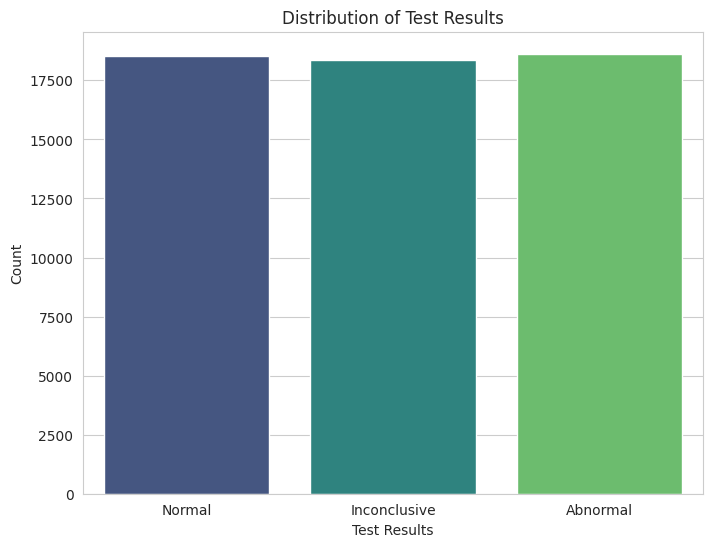

In [30]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Test Results', palette='viridis')
plt.title('Distribution of Test Results')
plt.xlabel('Test Results')
plt.ylabel('Count')
plt.show()

### **2.2. Univariate Analysis**

Analyze the distribution of numerical features (Age, Billing Amount)

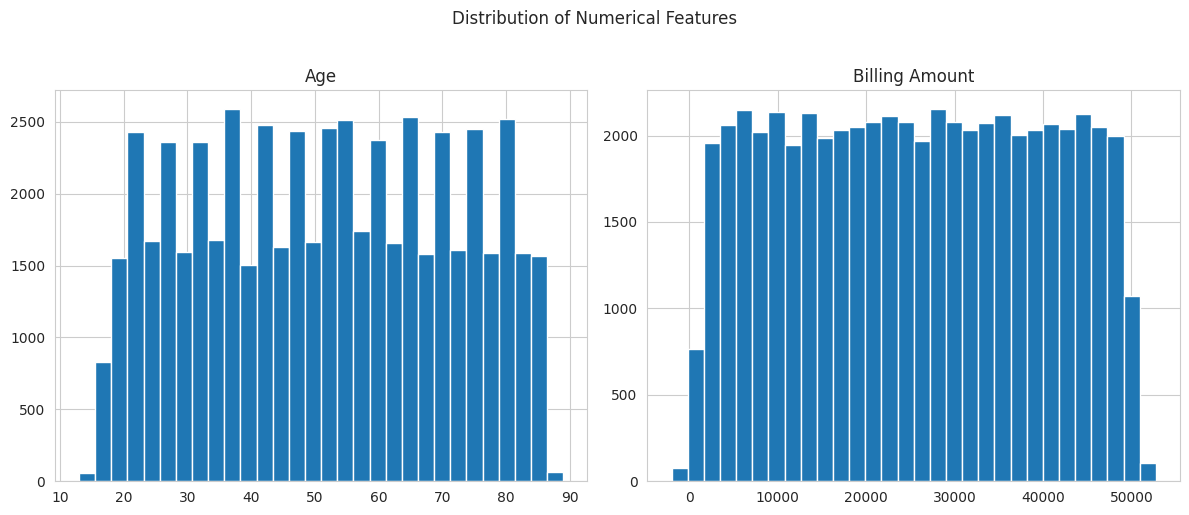

In [25]:
numerical_features = ['Age', 'Billing Amount']
df[numerical_features].hist(figsize=(12, 5), bins=30)
plt.suptitle('Distribution of Numerical Features', y=1.02)
plt.tight_layout()
plt.show()

In [ ]:
numerical_features = ['Age', 'Billing Amount']
df[numerical_features].hist(figsize=(12, 5), bins=30)
plt.suptitle('Distribution of Numerical Features', y=1.02)
plt.tight_layout()
plt.show()

# Analyze the distribution of key categorical features (Medical Condition, Gender)
categorical_features = ['Medical Condition', 'Gender', ]
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
for i, col in enumerate(categorical_features):
    sns.countplot(data=df, y=col, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel(col)
plt.tight_layout()
plt.show()

In [ ]:
# 2.3. Bivariate Analysis

# Analyze the relationship between 'Medical Condition' and 'Test Results'
plt.figure(figsize=(12, 7))
sns.countplot(data=df, y='Medical Condition', hue='Test Results', palette='viridis')
plt.title('Test Results by Medical Condition')
plt.xlabel('Count')
plt.ylabel('Medical Condition')
plt.show()

# Analyze the relationship between 'Age' and 'Test Results' using a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Test Results', y='Age', palette='viridis')
plt.title('Age vs. Test Results')
plt.xlabel('Test Results')
plt.ylabel('Age')
plt.show()

# Create a heatmap to visualize the correlation matrix of numerical features
plt.figure(figsize=(8, 6))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()